# MNIST 데이터셋으로 손글씨 인식 모델 만들기

**원활한 실습을 위해서 가급적 `colab`에서 진행 해 주세요.**

![image](https://cdn-images-1.medium.com/max/1200/1*AwJZkWLKabIicUPzSN6KCg.png)

# 프로젝트 준비
필요한 python 패키지들을 import 합니다.

In [ ]:
import matplotlib.pyplot as plt

import keras
import numpy as np
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, AveragePooling2D, Dense

데이터를 보기 좋게 출력하는 함수를 선언하고 테스트 합니다.

In [ ]:
def show(arr):
  df = pd.DataFrame(arr)
  display(df)

# Test
show([[1, 2, 3, 4], [5, 6, 7, 8]])

,0,1,2,3
0,1,2,3,4
1,5,6,7,8


# mnist 데이터셋 로드

`mnist` 데이터셋을 각각 `train` 데이터셋과 `valid` 데이터셋으로 로드 합니다.

In [ ]:
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

데이터의 모양(shape)을 확인합니다.

 - `x_train`에는 28 x 28 이미지 60,000개가 있습니다.
 - `y_train`에는 정답 데이터 60,000개가 있습니다.
 - `x_valid`에는 28 x 28 이미지 10,000개가 있습니다.
 - `x_valid`에는 정답 데이터 10,000개가 있습니다.

In [ ]:
# Train
print(f"x_train.shape : {x_train.shape}")
print(f"y_train.shape : {y_train.shape}")

# Valid
print(f"x_valid.shape : {x_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

x_train.shape : (60000, 28, 28)
y_train.shape : (60000,)
x_valid.shape : (10000, 28, 28)
y_valid.shape : (10000,)


# 데이터 크기 변경

`28x28` 이미지를 `32x32` 이미지로 수정 합니다.

두 번째 차원과 세 번째 차원에 각 각 (2,2) 만큼의 padding을 추가 합니다.

**아래 코드가 두 번 이상 실행되어서 padding이 중복으로 생기지 않도록 주의하세요**

In [ ]:
x_train = np.pad(x_train, ((0,0),(2,2),(2,2)), 'constant')
x_valid = np.pad(x_valid, ((0,0),(2,2),(2,2)), 'constant')

# Train
print(f"x_train.shape : {x_train.shape}")
print(f"y_train.shape : {y_train.shape}")

# Valid
print(f"x_valid.shape : {x_valid.shape}")
print(f"y_valid.shape : {y_valid.shape}")

x_train.shape : (60000, 32, 32)
y_train.shape : (60000,)
x_valid.shape : (10000, 32, 32)
y_valid.shape : (10000,)


# 데이터셋 확인

데이터를 내용을 확인해 봅니다.

- 60,000 개의 학습 데이터 중 0번째 데이터를 출력해 봅니다.
- 60,000 개의 정답 데이터를 모두 출력해 봅니다.

In [ ]:
show(x_train[0, :, :])
show(y_train)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,166,255,247,127,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,253,242,195,64,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,49,...,82,56,39,0,0,0,0,0,0,0


,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


데이터를 내용을 확인해 봅니다.

- 60,000 개의 학습 데이터 중, 0번째 이미지를 출력해 봅니다.
- 60,000 개의 학습 데이터 정답 중, 0번째 정답을 출력해 봅니다.

x_train[0] : 5


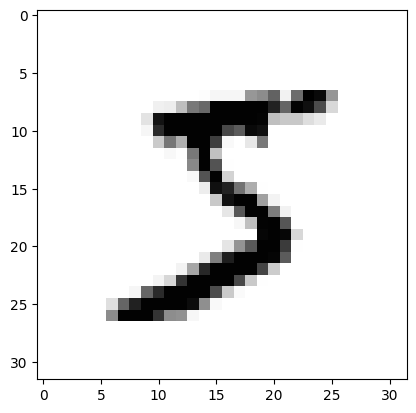

In [ ]:
plt.imshow(x_train[0], cmap='Greys')
print(f"x_train[0] : {y_train[0]}")

데이터를 내용을 확인해 봅니다.

- 60,000 개의 학습 데이터 중, 1번째 이미지를 출력해 봅니다.
- 60,000 개의 학습 데이터 정답 중 1번째 정답을 출력해 봅니다.

x_train[1] : 0


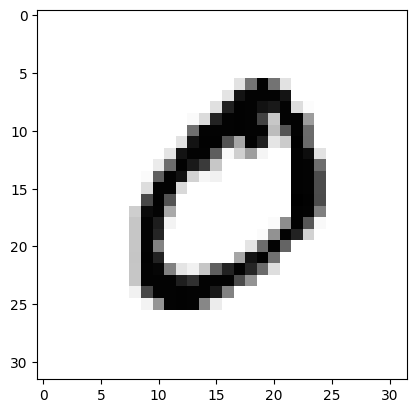

In [ ]:
plt.imshow(x_train[1], cmap='Greys')
print(f"x_train[1] : {y_train[1]}")

# 데이터 변환

학습을 위해 데이터를 shape을 수정 합니다. 맨 끝 차원은 데이터의 채널 차원입니다.

흑백 이미지이기 때문에 1차원이고 빈 차원을 추가 합니다.

reshape 전 후 데이터 shape 변화를 확인 합니다.

In [ ]:
print(x_train.shape)
print(x_valid.shape)
x_train = x_train.reshape(60000, 32, 32, 1).astype('float32')
x_valid = x_valid.reshape(10000, 32, 32, 1).astype('float32')
print(x_train.shape)
print(x_valid.shape)

(60000, 32, 32)
(10000, 32, 32)
(60000, 32, 32, 1)
(10000, 32, 32, 1)



원래 `0` ~ `255` 데이터를 `0` ~ `1` 데이터로 만들기 위해서 모든 값에 `/255` 연산을 합니다.

**(주의) 이 코드가 두 번 실행되면 아주 작은 값이 되기 때문에 주의 하세요.**

`/255` 연산 전 후로 데이터 값을 확인합니다.

In [ ]:
show(x_train[1, 10, 10:15, 0])
show(x_valid[1, 10, 10:15, 0])
x_train /= 255
x_valid /= 255
show(x_train[1, 10, 10:15, 0])
show(x_valid[1, 10, 10:15, 0])

,0
0,0.0
1,0.0
2,0.0
3,163.0
4,252.0


,0
0,31.0
1,18.0
2,0.0
3,0.0
4,0.0


,0
0,0.000000
1,0.000000
2,0.000000
3,0.639216
4,0.988235


,0
0,0.121569
1,0.070588
2,0.000000
3,0.000000
4,0.000000


## 정답 데이터 변환

정답 데이터를 one-hot 벡터로 변환해 줍니다.

 - 예를 들어 `3`은 `0 0 0 1 0 0 0 0 0 0`으로 변환 합니다.
 - 예를 들어 `5`은 `0 0 0 0 0 1 0 0 0 0`으로 변환 합니다.

In [ ]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

0번째와 1번째 데이터를 확인해 봅니다.

In [ ]:
print(y_train[0])
print(y_train[1])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## 모델 구조 구현

LeNET을 구현 합니다.

![image](https://cdn-images-1.medium.com/max/1200/1*AwJZkWLKabIicUPzSN6KCg.png)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(5, 5),strides=1, activation='relu', input_shape=(32,32,1)))
model.add(AveragePooling2D(pool_size = 2, strides = 2))
model.add(Conv2D(filters=16, kernel_size=(5, 5),strides=1, activation='relu'))
model.add(AveragePooling2D(pool_size = 2, strides = 2))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

## 학습

준비된 데이터셋을 준비된 모델에 학습 합니다.

In [ ]:
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/10
469/469 [==============================] - 14s 10ms/step - loss: 0.3843 - accuracy: 0.8931 - val_loss: 0.1245 - val_accuracy: 0.9636
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1037 - accuracy: 0.9689 - val_loss: 0.0662 - val_accuracy: 0.9771
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0706 - accuracy: 0.9779 - val_loss: 0.0565 - val_accuracy: 0.9805
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0436 - val_accuracy: 0.9857
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0468 - accuracy: 0.9856 - val_loss: 0.0419 - val_accuracy: 0.9854
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0455 - val_accuracy: 0.9861
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0353 - accuracy: 0.9888 - val_loss: 0.0377 - val_accuracy: 0.9876
Epoc

## 테스트

임의의 200번째 vaild 데이터로 모델의 추론 결과를 확인해 봅니다.

1/1 [==============================] - 0s 61ms/step
predict result is [[3.6965597e-11 2.5109102e-08 1.8059185e-07 9.9999702e-01 2.3265879e-12
  5.8575802e-07 2.9808695e-12 3.1956435e-10 2.1049243e-06 9.1191048e-08]]
answer is [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
argmax is 3


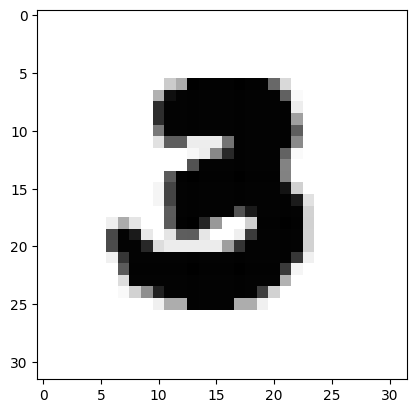

In [ ]:
plt.imshow(x_valid[200], cmap='Greys')
ret = model.predict(x_valid[200].reshape(1, 32, 32, 1))

print(f"predict result is {ret}")
print(f"answer is {y_valid[200]}")
print(f"argmax is {np.argmax(ret)}")